<a href="https://colab.research.google.com/github/RyanNewB/Assessment-2-Programming-Assignment-2/blob/main/Assignment_2_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set up the environment:**

Create a new Google Colab notebook.

Connect the notebook to your GitHub account.

Import the necessary libraries (SQLite3, Pandas, Numpy, Matplotlib) – only use these
libraries.

**Access the database:**

Connect to the provided SQLite database using the SQLite3 library.

Examine the schema of the database and understand the structure of the tables.

**Data extraction and manipulation:**

Write SQL queries to extract relevant information from the tables.

Use Pandas to load the query results into data frames and perform data manipulation
tasks such as filtering, grouping, and aggregation.

Clean and pre-process the data, addressing any missing or inconsistent values.

**Interpretation and conclusion:**

Summarise the main insights you have gained from the data analysis.

Discuss any limitations of your analysis and suggest possible improvements.

Reflect on the usability and effectiveness of Python notebooks as Report.

Reflect on the use of Gen AI in aiding in problem solving and data analysis.

**Introduction:**

Exploring Australian Energy Data with Python

In this project, our group will delve into Australian energy data using Python in Google Colab notebooks. We’ll learn how to connect to databases, analyze data, create visualizations, and apply best practices in programming. Along the way, we’ll extract insights, collaborate effectively, apply statistical methods and machine learning techniques as needed and implement version control using GitHub to collaborate seamlessly.

Our task is to work with the provided dataset, extract insights, and present them visually. We’ll create informative charts and graphs to showcase energy-related trends.

**Setting up the environment:**

As part of our assignment, our group has prepared both Business and Development reports in Google Colab. Here’s what we’ve done:

Business Report:
We’ve created a comprehensive report that includes analysis, insights, and discussions.
This report is ready to run in Google Colab with no additional steps.

Development Notebook:
Our development notebook contains pseudocode, testing, and other industry best practices.
We’ve uploaded both notebooks to our Group’s GitHub account, along with the names and student IDs of our team members.

Libraries Used:
For this task, we’ve imported essential libraries: SQLite3, Pandas, and Matplotlib.


*import sqlite3*

*import pandas as pd*

*import matplotlib.pyplot as plt*

**Accessing the database:**

We have established the connection with the given SQLite3 database 'AUS_energy_sqlite3.db'

Here, we can start to inspect the dataset from the 'AUS_energy_sqlite3.db'.


See code below:

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('AUS_energy_sqlite3.db')

# Query the names of all tables in the database
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and display the table name
tables = pd.read_sql(query_tables, conn)
print(tables)


         name
0  AUS_energy


First line is to import the SQLite module.

Second line is establishes a connection to an SQLite database file named 'AUS_energy_sqlite3.db'.

And the Third line is to create an cursor object to execute SQL queries and fetch results from the database.

The code establishes a connection to an SQLite database (AUS_energy_sqlite3.db) as given for this task and prepares a cursor  object for executing SQL queries for data inspection.

In [ ]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

SQL Query:

The SQL query above retrieves the names of the tables in an SQLite database.
It looks for tables within the database by querying the sqlite_master table.
Specifically, it selects the name column from the sqlite_master table where the type is 'table'.

The cursor.execute(sql) line executes the SQL query.
The result of the query is fetched using cursor.fetchall(), which returns a list of table names.

In [ ]:
sql='''
PRAGMA table_info('AUS_energy');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

SQL Query:

(PRAGMA table_info()):

The provided SQL query uses the PRAGMA table_info() statement.
It retrieves information about the columns (fields) within the table named 'AUS_energy'. Execute and fetchall for executing the query and getting the result corresponds to a column in the table.

**Data extraction and manipulation:**

In [ ]:
import pandas as pd

sql='''
SELECT * from AUS_energy;
'''
# Load the data into a DataFrame
AUS_energy_df = pd.read_sql_query(sql, connection)

In [ ]:
AUS_energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


Issue encountered: By using the code above, it showed that the dataset is incomplete with the Northern Territory (NT) state has no information or record on Coal.

In [ ]:
AUS_energy_df.describe()

,Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


In [ ]:
AUS_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [ ]:
AUS_energy_df.describe()

,Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


In [ ]:
AUS_energy_df[['State', 'GSP ($ million)']]

,State,GSP ($ million)
0,WA,244695
1,NSW,530532
2,VIC,368579
3,QLD,284526
4,SA,100174
...,...,...
93,VIC,500900
94,QLD,384508
95,SA,124252
96,TAS,36701


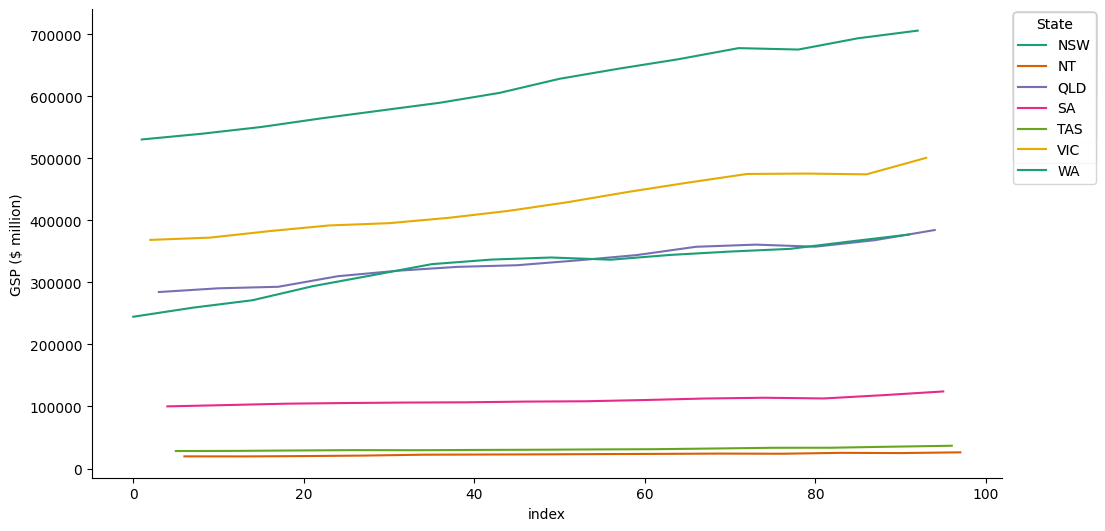

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['GSP ($ million)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('GSP ($ million)')

interpretation and conclusion.


#Summarise the main insights you have gained from the data analysis.

* Database connection issues:
* Problem: Unable to connect to the SQLite database.

* Insight: Ensure the database file path is correct and the file has the appropriate permissions. Use context managers (with statements) to handle connections properly.

* Solution:

In [ ]:
sqlite3.connect('database.db') as conn:

* SQL Syntax Errors:
* Problem: SQL queries fail due to syntax errors.

* Insight: Review SQL syntax carefully. Use multiline strings for complex queries to improve readability.

* solution:

In [ ]:
query = """
SELECT *
FROM table_name
WHERE condition;
"""
cursor.execute(query)


* Data Integrity Issues:
* Problem: Inconsistent or corrupted data.


* Insight: Use transactions to ensure data integrity. Always commit or rollback transactions as needed.


* Solution:

In [ ]:
try:
    cursor.execute(query)
    conn.commit()
except sqlite3.Error as e:
    conn.rollback()
    print(f"An error occurred: {e}")


* Matplotlib:

* Large Data Visualization:

* Problem: Plotting large datasets makes the plot unreadable.

* Insight: Downsample the data or use aggregation techniques to make the plot more readable.

Solution:


In [ ]:
df_sampled = df.sample(frac=0.1)  # Take a 10% sample of the data
plt.plot(df_sampled['x_column'], df_sampled['y_column'])
plt.show()


* Understanding common errors (such as syntax errors, type errors, and value errors) and how to troubleshoot them can significantly improve coding efficiency. Familiarize myself with error messages and stack traces. Hence I developed debuggig skills with the help of GEN AI.



# Discuss any limitations of your analysis and suggest possible improvements.

* we can get better in Python and make less mistakes by concentrating on frequent mistakes, debugging, documentation, practice, version control, code readability, and learning from mistakes. Slow performance, wasteful SQL queries, crowded visualisations, and poor data quality are some of the shortcomings of the investigation. comprehensive data cleansing, effective processing, error management, and detail records are some of the improvements.

# Reflect on the usability and effectiveness of Python notebooks as Report.

*  Python notebooks are interactive and include text, code, and visualisations, they work well for reporting. They facilitate comprehension and troubleshooting by improving consistency and quick result display. However, version control can be difficult, and they can become unmanageable with huge datasets and complex analyses.

# Reflect on the use of Gen AI in aiding in problem solving and data analysis:

*  Gen AI greatly facilitates problem-solving and data analysis. By swiftly analysing big datasets, finding patterns, and forecasting trends, it improves efficiency. Natural language processing and advanced analytics provided by Gen AI facilitate decision-making by facilitating easier access to complex data.